-  # <font color= 'red'> WEEK 4 PYTHON PROJECT </font>

   -  #   <font color ='green'> PART I: </font>


- ###             <font color='blue'> EDA & Data Preprocessing on Google App Store Rating Dataset. </font>

- ### <font color='Red'> Question 1 :</font>

    - Import required libraries and read the dataset.


- ### <font color ='green'> Answer: </font>

In [97]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# reading the data set

app_df = pd.read_csv('Apps_data+(1).csv')

- ### <font color='Red'> Question 2 :</font>

    -  Check the first few samples, shape, info of the data and try to familiarize yourself with different features.


- ### <font color ='green'> Answer: </font>

In [3]:
# checking the first few samples

app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# checking the random samples 

app_df.sample(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1093,Digit Save Money Automatically,FINANCE,4.5,8188,22M,"100,000+",Free,0,Everyone,Finance,"July 31, 2018",2.29.01,4.1 and up
3270,Remote Link (PC Remote),TOOLS,4.5,87055,Varies with device,"10,000,000+",Free,0,Everyone,Tools,"January 3, 2017",Varies with device,Varies with device
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up


In [5]:
# checking the shape

print('The shape of the dataframe is :' ,app_df.shape)

The shape of the dataframe is : (10841, 13)


In [6]:
# checking the informations about the data

app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


- ### <font color='Red'> Question 3 :</font>

    -    Check summary statistics of the dataset. List out the columns that need to be worked upon for model
         building.


- ### <font color ='green'> Answer: </font>

In [7]:
# checking summary statistics 

app_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


In [8]:
# columns need to be worked upon for model building

print('Columns to Work on :','Rating , Type , Content Rating , Current Ver , Android Ver')

Columns to Work on : Rating , Type , Content Rating , Current Ver , Android Ver


- ### <font color='Red'> Question 4 :</font>

    - Check if there are any duplicate records in the dataset? if any drop them.



- ### <font color ='green'> Answer: </font>

In [9]:
# checking for duplicates

app_df[app_df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


### Found 483 duplicate rows out of 10841 rows and going to drop them.

In [10]:
# dropping the duplicates

app_df.drop_duplicates(inplace =True)

In [11]:
# checking shape after dropping duplicates

print('Shape of the dataframe after dropping duplicate records : ',app_df.shape)

Shape of the dataframe after dropping duplicate records :  (10358, 13)


- ### <font color='Red'> Question 5 :</font>

    - Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.



- ### <font color ='green'> Answer: </font>

In [12]:
app_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

### Found an Invalid Category '1.9' , So going to drop that value presented rows.

In [13]:
# retrieving the rows which has '1.9' as value on Category column

app_df[app_df['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [14]:
# dropping the rows which has invalid categories

app_df.drop(app_df[app_df['Category']=='1.9'].index, inplace =True)

In [15]:
# checking shape after dropping 

app_df.shape

(10357, 13)

- ### <font color='Red'> Question 6 :</font>

    -  Check if there are missing values present in the column Rating, If any? drop them and and create a new
        column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)



- ### <font color ='green'> Answer: </font>

In [16]:
# checking for missing values

missing_values = app_df['Rating'].isna().sum()
print(f'There are total of {missing_values} missing records in Rating Column.')

There are total of 1465 missing records in Rating Column.


In [17]:
# dropping the missing values in Rating column

app_df.dropna(subset=['Rating'],inplace =True)

In [18]:
# checking shape after dropping 1465 rows which has NaN values

app_df.shape

(8892, 13)

In [19]:
print('Total records which is higher than 3.5 is :' , 8012)
print('Total records which is less than or equal to 3.5 is :' , 880)

Total records which is higher than 3.5 is : 8012
Total records which is less than or equal to 3.5 is : 880


In [20]:
# adding the column and assing high and low values

app_df['Rating_category'] = app_df['Rating'].apply( lambda x : 'high' if x > 3.5 else 'low')

In [21]:
print('Individual total of high and low categories :\n' ,app_df["Rating_category"].value_counts())

Individual total of high and low categories :
 high    8012
low      880
Name: Rating_category, dtype: int64


- ### <font color='Red'> Question 7 :</font>

    -   Check the distribution of the newly created column 'Rating_category' and comment on the distribution.


- ### <font color ='green'> Answer: </font>

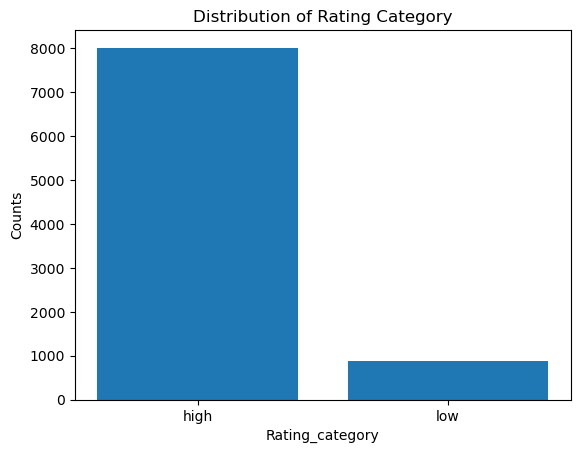

In [22]:
# checking distribution using bar plot because the column is categorical
distribution = app_df["Rating_category"].value_counts()

plt.bar(distribution.index , distribution.values)
plt.xlabel('Rating_category')
plt.ylabel('Counts')
plt.title('Distribution of Rating Category')
plt.show()

  - ## <font color ='blue'> Observation: </font>
    - The distribution appears to be imbalanced, with a significantly higher number of instances categorized as 'high' compared        to 'low'. This suggests that the majority of the ratings in the dataset are considered high.
    - This indicates that the majority of the ratings are above the threshold of 3.5 rating.
    - Considering the chosen threshold of 3.5 for categorizing may have contributed to the imbalanced distribution. May be              adjusting the threshold result in balanced distribution.

- ### <font color='Red'> Question 8 :</font>

    -   Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and
         handle the outliers using a transformation approach.(Hint: Use log transformation)



- ### <font color ='green'> Answer: </font>

In [23]:
# before converting to numeric

app_df['Reviews'].dtypes

dtype('O')

In [24]:
# converting to numerical column

app_df['Reviews'] = pd.to_numeric(app_df['Reviews'])

In [25]:
# after converting the dtype has changed from object to int64

app_df['Reviews'].dtypes

dtype('int64')

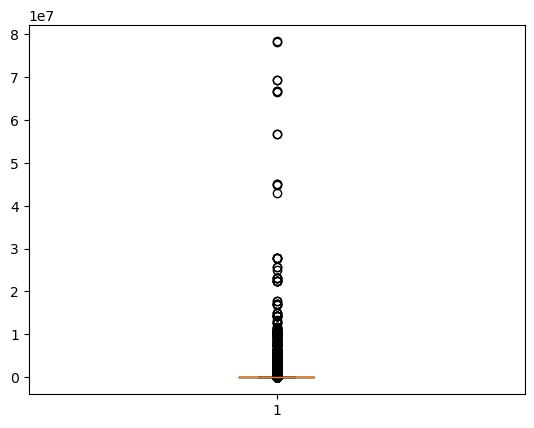

In [26]:
# checking outliers using box plot

plt.boxplot(app_df['Reviews'])
plt.show()

In [27]:
# checking for outlier records and storing in outliers variable

Q1 = app_df['Reviews'].quantile(0.25)
Q3 = app_df['Reviews'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = app_df[(app_df['Reviews'] < lower_bound) | (app_df['Reviews'] > upper_bound)]
outliers                 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
18,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,39M,"5,000,000+",Free,0,Everyone,Art & Design,"August 3, 2018",2.2.5,4.0.3 and up,high
19,ibis Paint X,ART_AND_DESIGN,4.6,224399,31M,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",5.5.4,4.1 and up,high
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device,high
72,"Android Auto - Maps, Media, Messaging & Voice",AUTO_AND_VEHICLES,4.2,271920,16M,"10,000,000+",Free,0,Teen,Auto & Vehicles,"July 11, 2018",Varies with device,5.0 and up,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10740,PhotoFunia,PHOTOGRAPHY,4.3,316378,4.4M,"10,000,000+",Free,0,Everyone,Photography,"June 3, 2017",4.0.7.0,2.3 and up,high
10781,Modern Strike Online,GAME,4.3,834117,44M,"10,000,000+",Free,0,Teen,Action,"July 30, 2018",1.25.4,4.1 and up,high
10784,Big Hunter,GAME,4.3,245455,84M,"10,000,000+",Free,0,Everyone 10+,Action,"May 31, 2018",2.8.6,4.0 and up,high
10809,Castle Clash: RPG War and Strategy FR,FAMILY,4.7,376223,24M,"1,000,000+",Free,0,Everyone,Strategy,"July 18, 2018",1.4.2,4.1 and up,high


In [28]:
# Handle outliers using a log transformation approach

app_df['Reviews'] = np.log1p(app_df['Reviews'])

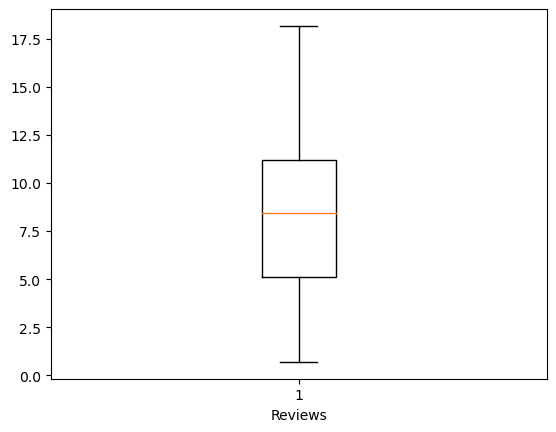

In [29]:
# after log tranformation checking whether the outliers present or not

plt.boxplot(app_df['Reviews'])
plt.xlabel('Reviews')
plt.show()

- ### <font color='Red'> Question 9 :</font>

    -   The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into
          suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where
          size='Varies with device')



- ### <font color ='green'> Answer: </font>

In [30]:
# converting M into million and K to thousand

app_df['Size']=app_df['Size'].str.replace('M' , 'e+6').str.replace('k' ,'e+3')

In [31]:
# eliminating the entries with value 'Varies with device'

app_df = app_df[app_df['Size'] != 'Varies with device']

In [32]:
app_df.shape

(7424, 14)

In [33]:
# converting the column to suitable numberic data type

app_df['Size'] = pd.to_numeric(app_df['Size'])

In [34]:
app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281389,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high


- ### <font color='Red'> Question 10 :</font>

    -   Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.




- ### <font color ='green'> Answer: </font>

In [35]:
# before treating and checking for unwanted characters

app_df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [36]:
# using replace treating unwanted characters

app_df['Installs'] = app_df['Installs'].str.replace('[+,]','')

C:\Users\navee\AppData\Local\Temp\ipykernel_4988\1795343308.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  app_df['Installs'] = app_df['Installs'].str.replace('[+,]','')


In [37]:
# aftet treating 

app_df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000', '500000000',
       '100', '500', '10', '1000000000', '5', '50', '1'], dtype=object)

In [38]:
app_df['Installs'].dtypes

dtype('O')

In [39]:
# converting from object to numeric data type

app_df["Installs"] = pd.to_numeric(app_df['Installs'])

In [40]:
app_df['Installs'].dtypes

dtype('int64')

- ### <font color='Red'> Question 11 :</font>

    -    Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.




- ### <font color ='green'> Answer: </font>

In [41]:
# checking for unwanted characters

app_df['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [42]:
# removing unwanted characters

app_df['Price'] = app_df['Price'].str.replace('$','', regex =True)

In [43]:
# after removing unwanted characters

app_df['Price'].unique()

array(['0', '4.99', '6.99', '7.99', '3.99', '5.99', '2.99', '1.99',
       '9.99', '0.99', '9.00', '5.49', '10.00', '24.99', '11.99', '79.99',
       '16.99', '14.99', '29.99', '12.99', '3.49', '10.99', '7.49',
       '1.50', '19.99', '15.99', '33.99', '39.99', '2.49', '4.49', '1.70',
       '1.49', '3.88', '399.99', '17.99', '400.00', '3.02', '1.76',
       '4.84', '4.77', '1.61', '1.59', '6.49', '1.29', '299.99', '379.99',
       '37.99', '18.99', '389.99', '8.49', '1.75', '14.00', '2.00',
       '3.08', '2.59', '19.40', '15.46', '8.99', '3.04', '13.99', '4.29',
       '3.28', '4.60', '1.00', '2.90', '1.97', '2.56', '1.20'],
      dtype=object)

In [44]:
app_df['Price'].dtypes

dtype('O')

In [45]:
# converting to numeric data type

app_df['Price'] = pd.to_numeric(app_df['Price'])

In [46]:
app_df['Price'].dtypes

dtype('float64')

- ### <font color='Red'> Question 12 :</font>

    -    Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we
          created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated',
         'Current Ver','Android Ver' columns since which are redundant for our analysis)




- ### <font color ='green'> Answer: </font>

In [47]:
# storing the redundant columns in list

redundant_columns = ['Rating','App','Genres','Last Updated','Current Ver','Android Ver']

In [48]:
# dropping the redundant columns

app_df = app_df.drop(redundant_columns , axis =1)

In [49]:
# checking for dropping columns

app_df.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.075174,19000000.0,10000,Free,0.0,Everyone,high
1,ART_AND_DESIGN,6.875232,14000000.0,500000,Free,0.0,Everyone,high
2,ART_AND_DESIGN,11.379520,8700000.0,5000000,Free,0.0,Everyone,high
3,ART_AND_DESIGN,12.281389,25000000.0,50000000,Free,0.0,Teen,high
4,ART_AND_DESIGN,6.875232,2800000.0,100000,Free,0.0,Everyone,high


- ### <font color='Red'> Question 13 :</font>

    -   Encode the categorical columns.



- ### <font color ='green'> Answer: </font>

## Encoding the categorical variables using One Hot Encoding 'get_dummies' except Rating_category because it is used as target

In [77]:
app_encoded = app_df.copy()

In [78]:
categorical_columns = ['Category', 'Type', 'Content Rating']

encoded_features = pd.get_dummies(app_encoded[categorical_columns], prefix=categorical_columns)

app_encoded = pd.concat([app_encoded, encoded_features], axis=1)

app_encoded.drop(categorical_columns, axis=1, inplace=True)

In [79]:
app_encoded.head()

,Reviews,Size,Installs,Price,Rating_category,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,5.075174,19000000.0,10000,0.0,high,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,6.875232,14000000.0,500000,0.0,high,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,11.379520,8700000.0,5000000,0.0,high,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,12.281389,25000000.0,50000000,0.0,high,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,6.875232,2800000.0,100000,0.0,high,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


## Encoding the categorical variable 'Rating_category' using Label Encoder 

In [80]:
label_encoder = LabelEncoder()

app_encoded['Rating_category_encoded'] = label_encoder.fit_transform(app_encoded['Rating_category'])

app_encoded.head()

,Reviews,Size,Installs,Price,Rating_category,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Category_WEATHER,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Rating_category_encoded
0,5.075174,19000000.0,10000,0.0,high,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,6.875232,14000000.0,500000,0.0,high,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,11.379520,8700000.0,5000000,0.0,high,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,12.281389,25000000.0,50000000,0.0,high,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,6.875232,2800000.0,100000,0.0,high,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [81]:
app_encoded.drop(['Rating_category'], axis=1, inplace=True)
app_encoded.head()

,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Category_WEATHER,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Rating_category_encoded
0,5.075174,19000000.0,10000,0.0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,6.875232,14000000.0,500000,0.0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,11.379520,8700000.0,5000000,0.0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,12.281389,25000000.0,50000000,0.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,6.875232,2800000.0,100000,0.0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


- ### <font color='Red'> Question 14 :</font>

    -   Segregate the target and independent features (Hint: Use Rating_category as the target)



- ### <font color ='green'> Answer: </font>

In [89]:
# rating_category as target

target = app_encoded['Rating_category_encoded']

#independent features

independent_features = app_encoded.drop('Rating_category_encoded', axis=1)

In [91]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: Rating_category_encoded, dtype: int32

In [86]:
independent_features.head()

,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,5.075174,19000000.0,10000,0.0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,6.875232,14000000.0,500000,0.0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,11.379520,8700000.0,5000000,0.0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,12.281389,25000000.0,50000000,0.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,6.875232,2800000.0,100000,0.0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


- ### <font color='Red'> Question 15 :</font>

    -   Split the dataset into train and test.



- ### <font color ='green'> Answer: </font>

In [94]:
x_train , x_test , y_train , y_test = train_test_split(independent_features, target , test_size=0.30, random_state=42)

In [96]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(5196, 45) (2228, 45)
(5196,) (2228,)


- ### <font color='Red'> Question 16 :</font>

    -   Standardize the data, so that the values are within a particular range.



- ### <font color ='green'> Answer: </font>

In [98]:
#standardizing the data using StandardScaler from sklearn

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)


In [99]:
x_train_scaled

array([[-0.70921533,  0.13906904, -0.16736566, ...,  4.63610898,
        -0.3551589 , -0.01387418],
       [ 1.21346414, -0.50074741,  0.04580871, ..., -0.21569812,
        -0.3551589 , -0.01387418],
       [ 0.47211042, -0.74387767, -0.14701233, ..., -0.21569812,
        -0.3551589 , -0.01387418],
       ...,
       [ 0.54804675, -0.41543855, -0.15772461, ..., -0.21569812,
         2.81564114, -0.01387418],
       [ 1.42637184,  0.48030449,  0.04580871, ..., -0.21569812,
        -0.3551589 , -0.01387418],
       [-1.55622204,  0.86419436, -0.16842618, ..., -0.21569812,
        -0.3551589 , -0.01387418]])

In [100]:
x_test_scaled

array([[ 1.25786009,  2.48506272, -0.06131409, ..., -0.21569812,
         2.81564114, -0.01387418],
       [-0.8921385 , -0.64577248, -0.16822264, ..., -0.21569812,
        -0.3551589 , -0.01387418],
       [-0.91301158, -0.8462483 , -0.16822264, ..., -0.21569812,
        -0.3551589 , -0.01387418],
       ...,
       [ 1.09376121,  0.30968677, -0.14701233, ..., -0.21569812,
        -0.3551589 , -0.01387418],
       [ 1.62122135, -0.63297615,  1.97401915, ..., -0.21569812,
        -0.3551589 , -0.01387418],
       [ 0.58910223,  2.8689526 , -0.16629443, ..., -0.21569812,
        -0.3551589 , -0.01387418]])

   -  #   <font color ='green'> PART II: </font>


- ###             <font color='blue'> Data Visualization on Honey Production dataset using seaborn and matplotlib libraries.
 </font>

- ### <font color='Red'> Question 1 :</font>

    -   Import required libraries and read the dataset.




- ### <font color ='green'> Answer: </font>

In [56]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# reading the dataset

honey_df = pd.read_csv('honeyproduction.csv')

- ### <font color='Red'> Question 2 :</font>

    -   Check the first few samples, shape, info of the data and try to familiarize yourself with different features.





- ### <font color ='green'> Answer: </font>

In [60]:
# checking first few samples

honey_df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [62]:
# checking random samples 

honey_df.sample(3)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
565,MO,8000.0,43,344000.0,76000.0,2.14,736000.0,2011
467,AZ,20000.0,52,1040000.0,562000.0,1.45,1508000.0,2009
376,TX,82000.0,70,5740000.0,976000.0,0.89,5109000.0,2006


In [63]:
# checking the shape

print( 'The shape of the data is :', honey_df.shape)

The shape of the data is : (626, 8)


In [64]:
# checking informations(info)

honey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


- ### <font color='Red'> Question 3 :</font>

    -   Display the percentage distribution of the data in each year using the pie chart.






- ### <font color ='green'> Answer: </font>

In [81]:
# storing the data in variable

yearly_distribution = honey_df['year'].value_counts(normalize=True)

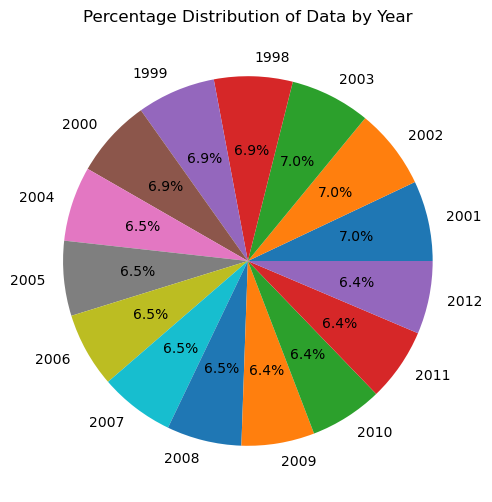

In [84]:
# creating pie chart for displaying the percentage distribution by using above dat

plt.figure(figsize=(8,6))
plt.pie(yearly_distribution ,labels=yearly_distribution.index,autopct='%1.1f%%')
plt.title('Percentage Distribution of Data by Year')
plt.show()

- ### <font color='Red'> Question 4 :</font>

    -    Plot and Understand the distribution of the variable "price per lb" using displot, and write your findings.







- ### <font color ='green'> Answer: </font>

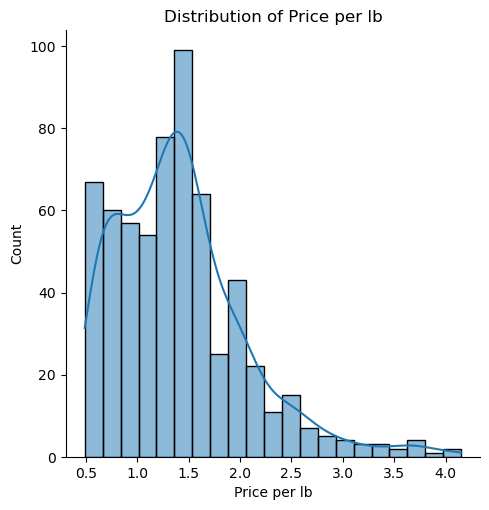

In [92]:
# plotting displot 

sns.displot(honey_df['priceperlb'] , kde =True)
plt.title('Distribution of Price per lb')
plt.xlabel('Price per lb')
plt.show()

  - ## <font color ='blue'> Observation: </font>
    - The distribution of "price per lb" appears to be right-skewed, with a longer tail on the right side.
    - The majority of instances are in the lower price range , while fewer instances are in the higher price per pound.
    - The KDE curve indicating peak around some price ranges and gradually decrease when the price per lb increases.

- ### <font color='Red'> Question 5 :</font>

    -    Plot and understand the relationship between the variables 'numcol' and 'prodval' through scatterplot, and
         write your findings.







- ### <font color ='green'> Answer: </font>

In [96]:
# storing data in variables

x1 = honey_df['numcol']
y1 = honey_df['prodvalue']

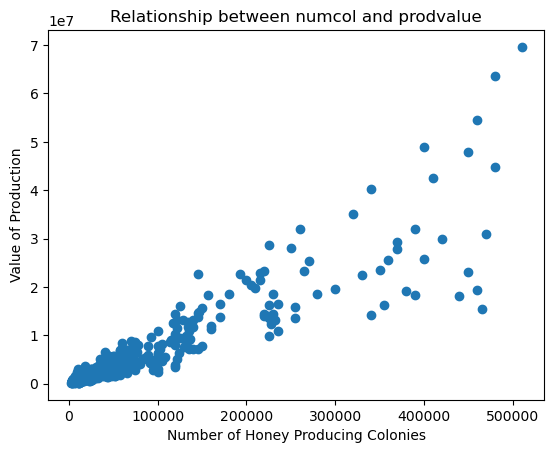

In [99]:
# plotting scatter plot

plt.scatter(x1,y1)
plt.title('Relationship between numcol and prodvalue')
plt.xlabel('Number of Honey Producing Colonies')
plt.ylabel('Value of Production')
plt.show()

  - ## <font color ='blue'> Observation: </font>
    - There is a positive correlation between the 'numcol' and the 'prodvalue'.
    - As the number of honey producing colonies increases, the value of production tends to increase as well.
    - The relationship is not perfectly linear. There are variations in the value of production for different numbers of honey         producing colonies.
    - There are some outliers in the plot as well.

- ### <font color='Red'> Question 6 :</font>

    -    Plot and understand the relationship between categorical variable 'year' and a numerical variable
         'prodvalue' through boxplot, and write your findings.








- ### <font color ='green'> Answer: </font>

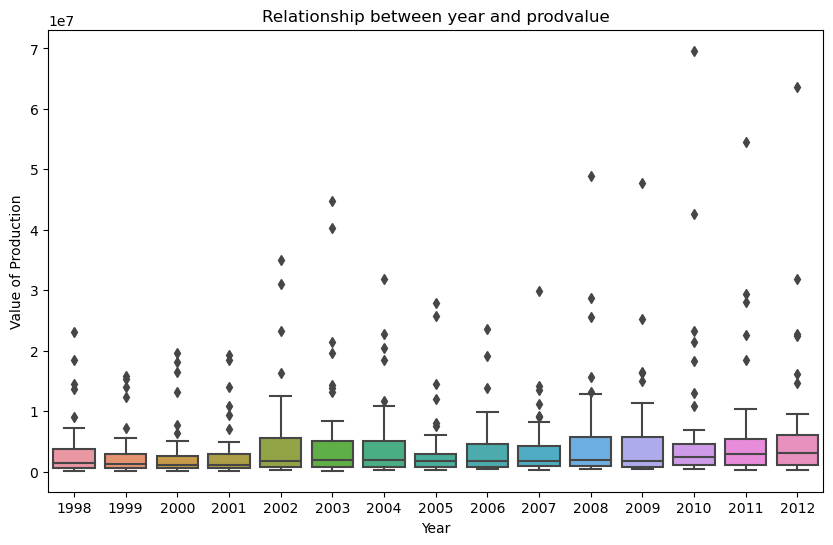

In [106]:
# plotting the bar plot

plt.figure(figsize=(10,6))
sns.boxplot(x='year', y='prodvalue', data=honey_df)
plt.title('Relationship between year and prodvalue')
plt.xlabel('Year')
plt.ylabel('Value of Production')
plt.show()

  - ## <font color ='blue'> Observation: </font>
    - By comparing the boxes and whiskers across different years, you can observe differences in the distribution and central          tendency of the 'prodvalue' variable.
    - Outliers are present in the above plot ,which are the points beyond the whiskers.
    - The above boxplot helps identify any year which has higher or lower median 'prodvalue' values.

- ### <font color='Red'> Question 7 :</font>

    -    Visualize and understand the relationship between the multiple pairs of variables throughout different years
          using pairplot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'prodvalue','year')








- ### <font color ='green'> Answer: </font>

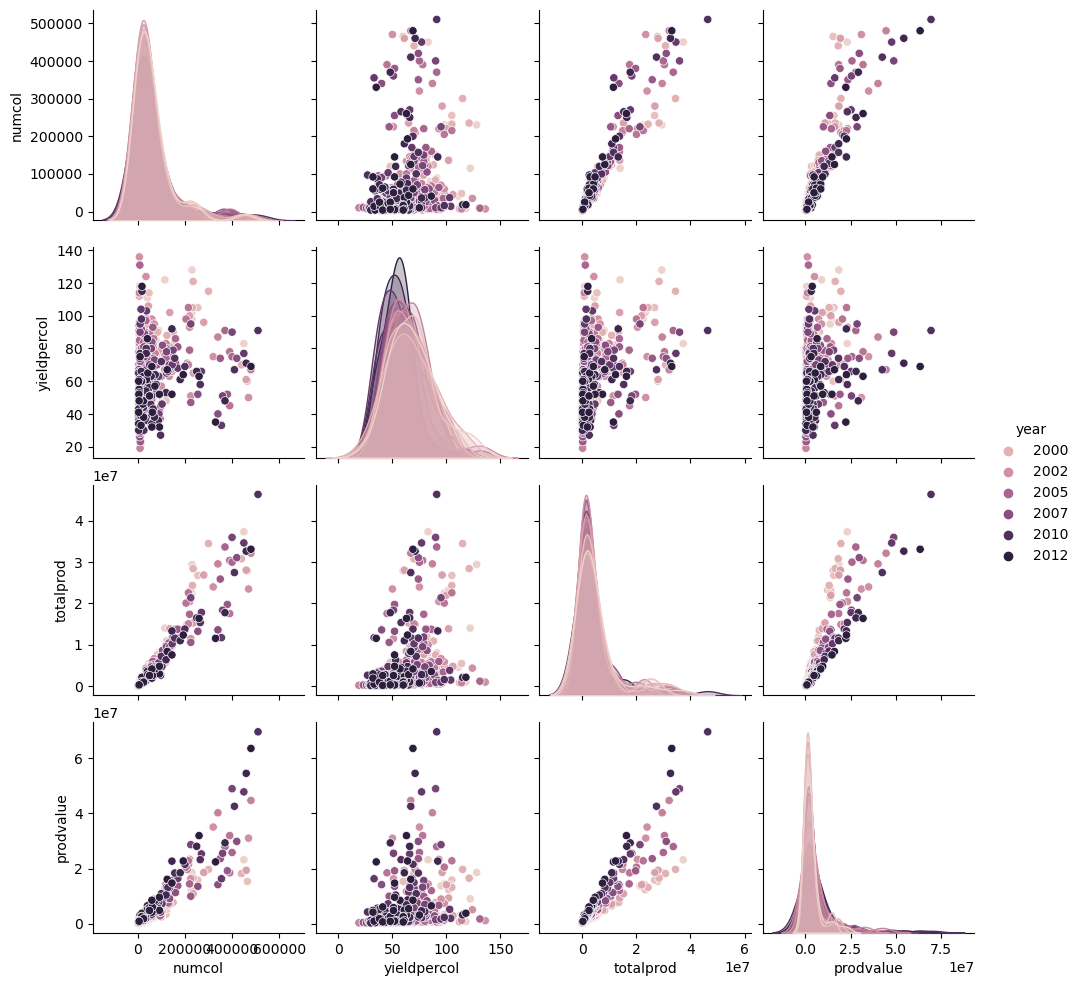

In [113]:
# plotting pair plot
# using year in hue param to distinguish different year in different color

sns.pairplot(data =honey_df, vars= ['numcol','yieldpercol','totalprod','prodvalue'], hue='year')
plt.show()

  - ## <font color ='blue'> Inference: </font>
    - The columns 'prodvalue'and 'numcol' , 'totalprod' and 'numcol' , 'prodvalue' and 'totalprod' which are having the positive       correlation.
    - 'year' column is used in the hue parameter to distinguish different year in different color.
    - The relationship is higher in the 2010 and 2012 because there is large number of data's presented in those years.

- ### <font color='Red'> Question 8 :</font>

    -   Display the correlation values using a plot and add your inferences. (use columns 'numcol', 'yield percol',
         'total prod', 'stocks', 'price per lb', 'prodvalue')

- ### <font color ='green'> Answer: </font>

In [123]:
# storing the required columns

cols = ['numcol','yieldpercol','totalprod','stocks','priceperlb','prodvalue']

# creating new daatframe

new_df = honey_df[cols]

#calculating the correlation

corr_matrix = new_df.corr()

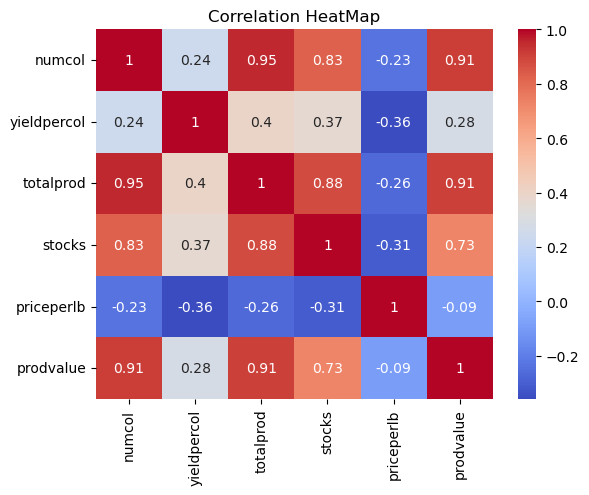

In [120]:
# plotting the correlation matrix using heat map

sns.heatmap(corr_matrix , annot=True , cmap='coolwarm')
plt.title('Correlation HeatMap')
plt.show()

  - ## <font color ='blue'> Inference: </font>
    - I'm using heatmap plot to visually represent the correlation between the given columns.
    - The 'numcol' and 'totalprod' having the strong postivie correlation of 0.95 indicates that if 'numcol' increases the            'totalprod' also increase and vice versa.
    - The columns 'numcol' and 'prodvalue' , 'totalprod' and 'prodvalue' , 'totalprod' and 'stocks' , 'stocks' and 'prodvalue' are aslo having slightly strong positive correlation .    
    - And the heat map contains weak negative correlations like 'priceperlb' and 'yieldpercol' of -0.36 , 'priceperlb' and 'prodvalue' of -0.09 etc.